# Linear modelling in Python – linear and logistic regression
This notebook brings examples of basic linear modelling in Python on artificial data. Its aim is just to show approaches and code that can be use for fitting model, getting coefficients, evaluating its performance and predicting.

## Contents
1. [Useful links](#Useful-links)
1. [Data](#Data)
1. [Linear regression](#Linear-regression)
1. [Logistic regression](#Logistic-regression)

## Useful links
* [Scikit LinearRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [Scikit LogisticRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Statsmodels linear regression](https://www.statsmodels.org/stable/regression.html)
* [Statsmodels OLS method (ordinary least squares)](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html)
* [Statsmodels Logit method (logistic regression)](https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html)
* [R style formulas in Statsmodels](https://www.statsmodels.org/stable/example_formulas.html)
* [Statsmodels ols method (ordinary least squares with R formula)](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html#statsmodels.formula.api.ols)
* [Statsmodels logit method (logistic regression with R formula)](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.logit.html)
* [Scikit cross validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Metrics for model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)
* [Scikit one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
* [Pandas one-hot encoding](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [1]:
# setup
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option("display.precision", 2)

## Data
This dataset is artificial. Data contains 16 rows and 5 columns: id, 2 binary columns (*approve* and *sex*) and 2 numeric columns (*age* and *salary*).

In [2]:
df_art = pd.DataFrame(data={'id': range(16),
                            'approve': [False, True, False, True, False, True, True, True, False, False, False,
                                        True, True, False, True, False],
                            'sex': np.concatenate((np.array(['M'] * 8), np.array(['F'] * 8))),
                            'age': [20, 52, 33, 23, 44, 56, 39, 30, 42, 38, 50, 27, 46, 25, 35, 47],
                            'salary': [20, 56, 37, 24, 47, 50, 41, 29, 45, 28, 43, 22, 45, 20, 28, 36]})
df_art

,id,approve,sex,age,salary
0,0,False,M,20,20
1,1,True,M,52,56
2,2,False,M,33,37
3,3,True,M,23,24
4,4,False,M,44,47
5,5,True,M,56,50
6,6,True,M,39,41
7,7,True,M,30,29
8,8,False,F,42,45
9,9,False,F,38,28


There are several packages for regression in Python. We deal with **sklearn** (scikit-learn) and **statsmodels**. Each of them has its pros and cons. **Sklearn** is machine-learning oriented, while **statsmodels** is better for explanatory and inferring purpose.

> With each approach we do these steps:

1. fitting a model
2. getting coefficients of the model
3. assessing significance of coeficients / possible dropping a predictor
4. assessing model performance
5. prediction

In [3]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Linear regression
In this part, we model *salary* ("response", "target") against *age* and *sex* ("predictors", "explanatory").

* [Linear regression with one numeric predictor](#Linear-regression-with-one-numeric-predictor)
* [Linear regression with one categorical predictor](#Linear-regression-with-one-categorical-predictor)
* [Linear regression with multiple predictors](#Linear-regression-with-multiple-predictors)

### Linear regression with one numeric predictor
Let's take *salary* as response and *age* as predictor.

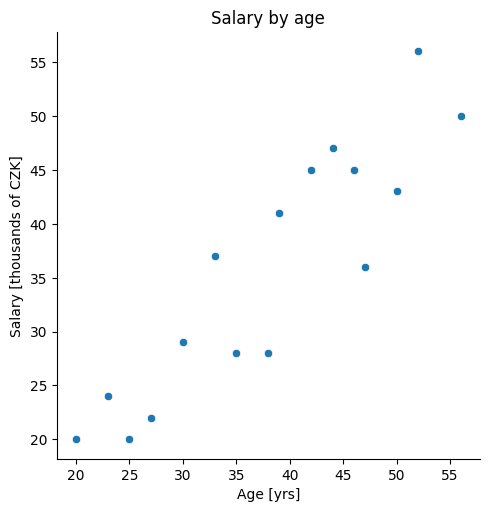

In [4]:
# chart
g = sns.relplot(data=df_art, x="age", y="salary") \
    .set_axis_labels("Age [yrs]", "Salary [thousands of CZK]") \
    .set(title="Salary by age")

#### A. Sklearn approach
Use [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class with method `fit` to create model object.  
Then use properties and methods of that object.

In [29]:
X = df_art[['age']]
y = df_art['salary']
# by default the intercept is included

### fit model
modelA = LinearRegression().fit(X, y)

### get coefficients
print('Intercept: ', modelA.intercept_)
print('Beta coefficients: ', modelA.coef_)

### assess coefficients / drop predictors
# There is no straight way (like p-value). We can use performance metric and assess it;
# then we can fit a submodel and compare performance metrics.

### assess model performance
# i. scoring itself directly (not recommended, overrates performance)
print('R2 on itself: ', modelA.score(X, y))
# ii. scoring by a cross-validation
# https://scikit-learn.org/stable/modules/cross_validation.html
scores = cross_val_score(LinearRegression(), X, y, cv=4)
print('R2 by cval: ', scores)

### predictions
x_pred = 35 # prediction of salary for 35 yrs old
print('Predicted salary for age=', x_pred, ' is ', modelA.predict([[x_pred]]))
# predictions can be made on actual predictor values, too -> added to the chart

Intercept:  -0.15693291178821056
Beta coefficients:  [0.94482854]
R2 on itself:  0.8104788906769791
R2 by cval:  [0.80951289 0.72864444 0.64242428 0.56363454]
Predicted salary for age= 35  is  [32.91206615]


c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### B. Statmodels classic
Use [OLS method](https://www.statsmodels.org/stable/regression.html) to create model object.  
Note that the model object is denoted as `res` there -- but we call it "model" to be consistent.

In [6]:
X_int = sm.add_constant(X)
# by default the intercept is NOT included - we need to add it

### fit model
modelB = sm.OLS(y, X_int).fit()

### get coefficients
print('Beta coefficients: ', modelB.params)

### assess coefficients / drop predictors
print(modelB.summary()) # detailed information of model and coefficients

### assess model
# i. scoring itself directly (not recommended, overrates performance)
print('R2 on itself: ', modelB.rsquared)
# ii. scoring by a cross-validation
# cross-validation not available in this package, we can use approximation:
print('R2 adjusted: ', modelB.rsquared_adj)

### predictions
x_pred = 35 # prediction of salary for 35 yrs old
print('Predicted salary for age=', x_pred, ' is ', modelB.predict([1, x_pred]))

Beta coefficients:  const   -0.16
age      0.94
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     59.87
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           2.01e-06
Time:                        11:05:14   Log-Likelihood:                -47.949
No. Observations:                  16   AIC:                             99.90
Df Residuals:                      14   BIC:                             101.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### C. Statsmodels with R formula notation
In R language, the relation "predictor <-> target" can be written as formula:  
*target* ~ *predictor1* + *predictor2* + ...

[This possibility has been included](https://www.statsmodels.org/stable/example_formulas.html) into `statmodels` package. Use [ols method](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html#statsmodels.formula.api.ols) from the `formula` submodule to create model object.

Differences to B approach:
* no need to add a column for the intercept
* values for predictions are entered as a DataFrame

Everything else is the same as for B approach.

In [7]:
### fit model
modelC = smf.ols("salary ~ age", data=df_art).fit() # by default the intercept is included

### get coefficients
print('Beta coefficients: ', modelC.params)

### assess coefficients / drop predictors
print(modelC.summary()) # detailed information of model and coefficients

### assess model
# i. scoring itself directly (not recommended, overrates performance)
print('R2 on itself: ', modelC.rsquared)
# ii. scoring by a cross-validation
# cross-validation not available in this package, we can use approximation:
print('R2 adjusted: ', modelC.rsquared_adj)

### predictions
x_pred = 35 # prediction of salary for 35 yrs old
y_pred = modelC.predict(pd.DataFrame({'age': x_pred}, index=range(1)))
print('Predicted salary for age=', x_pred, ' is ', y_pred.values)
# for prediction, data must be specified as DataFrame

Beta coefficients:  Intercept   -0.16
age          0.94
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     59.87
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           2.01e-06
Time:                        11:05:14   Log-Likelihood:                -47.949
No. Observations:                  16   AIC:                             99.90
Df Residuals:                      14   BIC:                             101.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[Back to linear regression](#Linear-regression)

----

### Linear regression with one categorical predictor

Let's take salary as response and sex as predictor.

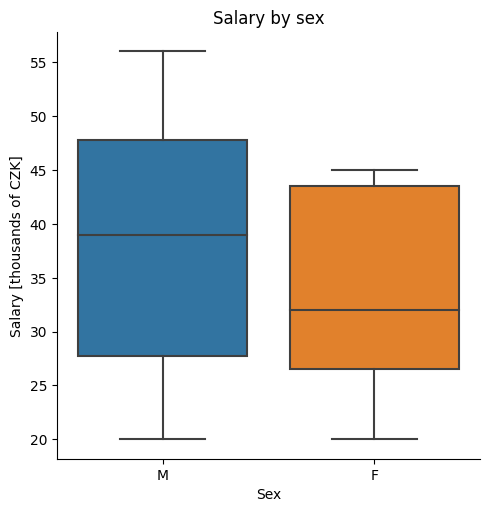

In [8]:
# chart
g = sns.catplot(data=df_art, x="sex", y="salary", kind="box") \
    .set_axis_labels("Sex", "Salary [thousands of CZK]") \
    .set(title="Salary by sex")

Because both A and B approaches can deal with numeric model matrix only, we have to convert character (or generally categorical) column to one or many 0/1 columns. It is called [one-hot-encoding](https://www.educative.io/blog/one-hot-encoding). This can be reached by [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) object or directly in pandas DataFrame by [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function.

The C approach does not need dummy.

In [9]:
# data preparation
df_art['sex_orig'] = df_art['sex'] # backup of the original column - it will be lost!
df_art = pd.get_dummies(df_art, columns=['sex'], drop_first=True)
df_art.rename(columns = {'sex_orig':'sex'}, inplace = True) # renaming backuped column back
df_art

,id,approve,age,salary,sex,sex_M
0,0,False,20,20,M,1
1,1,True,52,56,M,1
2,2,False,33,37,M,1
3,3,True,23,24,M,1
4,4,False,44,47,M,1
5,5,True,56,50,M,1
6,6,True,39,41,M,1
7,7,True,30,29,M,1
8,8,False,42,45,F,0
9,9,False,38,28,F,0


In [10]:
# common for both A and B approaches
X = df_art[['sex_M']]
y = df_art['salary']

# now fit and exploit the model as usually
# A. sklearn
modelA = LinearRegression().fit(X, y)
# and everything is the same...
print('Intercept: ', modelA.intercept_)
print('Beta coefficients: ', modelA.coef_)
print('R2 on itself: ', modelA.score(X, y))
scores = cross_val_score(LinearRegression(), X, y, cv=4)
print('R2 by cval: ', scores)
# except prediction - it must use follow dummy (one-hot) encoding, i.e. "male" -> sex_M=1
x_pred = 1
print('Predicted salary for sex ', x_pred, ' is ', modelA.predict([[x_pred]]))

Intercept:  33.375
Beta coefficients:  [4.625]
R2 on itself:  0.043182033246065066
R2 by cval:  [-0.28526149 -0.86956522 -0.05314961 -0.05873822]
Predicted salary for sex  1  is  [38.]


c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
# B. statmodels
# just use the dummy column (and add column of ones)
X_int = sm.add_constant(X) # by default there is no intercept in model matrix X - we need to add it

# now fit and exploit the model as usually
modelB = sm.OLS(y, X_int).fit()
print('Beta coefficients: ', modelB.params)
print(modelB.summary()) # detailed information of model and coefficients
print('R2 on itself: ', modelB.rsquared)
print('R2 adjusted: ', modelB.rsquared_adj)
x_pred = 1 # prediction of salary for a man, i. e. sex_M=1
print('Predicted salary for sex=', x_pred, ' is ', modelB.predict([1, x_pred]))

Beta coefficients:  const    33.38
sex_M     4.63
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.6318
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.440
Time:                        11:05:15   Log-Likelihood:                -60.902
No. Observations:                  16   AIC:                             125.8
Df Residuals:                      14   BIC:                             127.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
# C. statmodels with R formula notation
# no need to use dummy, just use R formula
modelC = smf.ols("salary ~ sex", data=df_art).fit()

# and everything is the same as at the numeric predictor
print('Beta coefficients: ', modelC.params)
print(modelC.summary()) # detailed information of model and coefficients
print('R2 on itself: ', modelC.rsquared)
print('R2 adjusted: ', modelC.rsquared_adj)
# for prediction, data must be specified as DataFrame
x_pred = 'M' # and data must keep the original encoding
y_pred = modelC.predict(pd.DataFrame({'sex': x_pred}, index=range(1)))
print('Predicted salary for sex=', x_pred, ' is ', y_pred.values)

Beta coefficients:  Intercept    33.38
sex[T.M]      4.63
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.6318
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.440
Time:                        11:05:15   Log-Likelihood:                -60.902
No. Observations:                  16   AIC:                             125.8
Df Residuals:                      14   BIC:                             127.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[Back to linear regression](#Linear-regression)

----

### Linear regression with multiple predictors
Let's take two predictors now: *age* and *sex*.

As we expect, it is necessary to use dummies for A and B approaches -- we use the matrix with two columns (*age*, *sex_M*) here. The C approach takes and preprocess columns just from the formula, so we need not make any preparation for it.

In [13]:
X = df_art[['age', 'sex_M']]
y = df_art['salary']

# A. sklearn
modelA = LinearRegression().fit(X, y)
print('Intercept: ', modelA.intercept_)
print('Beta coefficients: ', modelA.coef_)
x_pred = [35, 1]
print('Predicted salary for age=', x_pred[0], 'and sex=', x_pred[1], ' is ', modelA.predict([x_pred]))

Intercept:  -4.10473020199904
Beta coefficients:  [0.96721884 6.19673062]
Predicted salary for age= 35 and sex= 1  is  [35.94465996]


c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
# B. statmodels
X_int = sm.add_constant(X)
modelB = sm.OLS(y, X_int).fit()
print(modelB.summary())
print('Predicted salary for age=', x_pred[0], 'and sex=', x_pred[1], ' is ',
      modelB.predict([1, x_pred[0], x_pred[1]]))

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     51.30
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           6.78e-07
Time:                        11:05:15   Log-Likelihood:                -43.774
No. Observations:                  16   AIC:                             93.55
Df Residuals:                      13   BIC:                             95.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1047      4.066     -1.009      0.3

c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Predicted salary for age= 35 and sex= 1  is  [35.94465996]


In [15]:
# C. statmodels with R formula notation
modelC = smf.ols("salary ~ age + sex", data=df_art).fit()
print(modelC.summary()) # detailed information of model and coefficients
x_pred = [35, 'M'] # data must keep the original encoding
y_pred = modelC.predict(pd.DataFrame({'age': x_pred[0], 'sex': x_pred[1]}, index=range(1)))
print('Predicted salary for age=', x_pred[0], 'and sex=', x_pred[1], ' is ', y_pred.values)


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     51.30
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           6.78e-07
Time:                        11:05:15   Log-Likelihood:                -43.774
No. Observations:                  16   AIC:                             93.55
Df Residuals:                      13   BIC:                             95.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1047      4.066     -1.009      0.3

c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[Back to linear regression](#Linear-regression)

----

## Logistic regression
In this part, we model approval ("response", "target") against age and sex ("predictors", "explanatory").

* [Logistic regression with one numeric predictor](#Logistic-regression-with-one-numeric-predictor)
* [Logistic regression with multiple predictors](#Logistic-regression-with-multiple-predictors)

### Logistic regression with one numeric predictor
Let's take approval as response and age as predictor.

#### A. Sklearn approach
Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class with method `fit` to create model object.  
Then use properties and methods of that object.

In [16]:
X = df_art[['age']]
y = df_art['approve']
# target can be True/False; by deafult the intercept is included
### fit model
modelA = LogisticRegression(solver='newton-cg', penalty='none').fit(X, y)

### get coefficients
print('Intercept: ', modelA.intercept_)
print('Beta coefficients: ', modelA.coef_)

### assess coefficients / drop predictors
# Like LinearRegression, there is no straight way (like p-value). We can use performance metric and assess it;
# then we can fit a submodel and compare performance metrics.

### assess model performance
# i. scoring itself directly (not recommended, overrates performance)
# - score = accuracy
print('Accuracy on itself: ', modelA.score(X, y))
# ii. scoring by a cross-validation
# https://scikit-learn.org/stable/modules/cross_validation.html
# by default accuracy is used as a metric
scores = cross_val_score(LogisticRegression(solver='newton-cg', penalty='none'), X, y, cv=4)
print('Accuracy by cval: ', scores)
# but we can change it, see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scores = cross_val_score(LogisticRegression(solver='newton-cg', penalty='none'), X, y, cv=4,
                         scoring='roc_auc')
print('ROC AUC by cval: ', scores)

### predictions
x_pred = 35 # prediction of approval for 35 yrs old
print('Predicted approval for age=', x_pred, ' is ', modelA.predict([[x_pred]]))
# if we want probability rather than strict classification, use method predict_proba
# - it return probabilities of classes in the order False, True
print('Predicted probability of approval for age=', x_pred, ' is ', modelA.predict_proba([[x_pred]])[0][1])
# predictions can be made on actual predictor values, too -> for making the chart

Intercept:  [-0.38027565]
Beta coefficients:  [[0.01002357]]
Accuracy on itself:  0.4375
Accuracy by cval:  [0.25 0.5  0.25 0.5 ]
ROC AUC by cval:  [0.25 0.5  0.   0.5 ]
Predicted approval for age= 35  is  [False]
Predicted probability of approval for age= 35  is  0.4926378526392379


c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### B. Statmodels classic
Use [Logit method](https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html) to create model object.

In [17]:
X_int = sm.add_constant(X)
# by default the intercept is NOT included - we need to add it
# target can be True/False

### fit model
modelB = sm.Logit(y, X_int).fit(method='newton')
### get coefficients
print('Beta coefficients: ', modelB.params)

### assess coefficients / drop predictors
print(modelB.summary()) # detailed information of model and coefficients
print(modelB.summary2()) # or slightly different output (contains AIC and BIC)
# see https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html

### assess model
# i. scoring itself directly
print('Pseudo R2: ', modelB.prsquared)
# ii. scoring by a cross-validation
# cross-validation not available in this package, we can use approximation:
print('AIC on itself: ', modelB.aic)
print('BIC on itself: ', modelB.bic)

### predictions
x_pred = 35 # prediction of approval for 35 yrs old
print('Predicted probability of approval for age=', x_pred, ' is ', modelB.predict([1, x_pred]))

Optimization terminated successfully.
         Current function value: 0.691739
         Iterations 3
Beta coefficients:  const   -0.38
age      0.01
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                approve   No. Observations:                   16
Model:                          Logit   Df Residuals:                       14
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Nov 2022   Pseudo R-squ.:                0.002032
Time:                        11:05:15   Log-Likelihood:                -11.068
converged:                       True   LL-Null:                       -11.090
Covariance Type:            nonrobust   LLR p-value:                    0.8319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3803      1.862     -0.204  

#### C. Statsmodels with R formula notation
In R language, the relation "predictor <-> target" can be written as formula:  
*target* ~ *predictor1* + *predictor2* + ...

[This possibility has been included](https://www.statsmodels.org/stable/example_formulas.html?highlight=formula) into `statmodels` package. Use [logit method](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.logit.html#statsmodels.formula.api.logit) from the `formula` submodule to create model object.

Differences to B approach:
* no need to add a column for the intercept
* values for predictions are entered as a DataFrame

Everything else is the same as for B approach.

In [18]:
# target MUST BE O/1, otherwise it would be converted to dummy columns
df_art['approve_bin'] = df_art['approve'] * 1

modelC = smf.logit("approve_bin ~ age", data=df_art).fit() # by default the intercept is included
# everything except prediction is the same as at B
print('Beta coefficients: ', modelC.params)
print(modelC.summary()) # detailed information of model and coefficients
print('Pseudo R2: ', modelC.prsquared)
print('AIC on itself: ', modelC.aic)
print('BIC on itself: ', modelC.bic)

# for prediction, data must be specified as DataFrame
x_pred = 35 # prediction of approval for 35 yrs old
y_pred = modelC.predict(pd.DataFrame({'age': x_pred}, index=range(1)))
print('Predicted probability of approval for age=', x_pred, ' is ', y_pred.values)

Optimization terminated successfully.
         Current function value: 0.691739
         Iterations 3
Beta coefficients:  Intercept   -0.38
age          0.01
dtype: float64
                           Logit Regression Results                           
Dep. Variable:            approve_bin   No. Observations:                   16
Model:                          Logit   Df Residuals:                       14
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Nov 2022   Pseudo R-squ.:                0.002032
Time:                        11:05:15   Log-Likelihood:                -11.068
converged:                       True   LL-Null:                       -11.090
Covariance Type:            nonrobust   LLR p-value:                    0.8319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3803      1.862     

[Back to logistic regression](#Logistic-regression)

----

### Logistic regression with multiple predictors
*Note: regression with one categorical predictor only is not mentioned here. It is similar to the linear regression (see the [corresponding section](#Linear-regression-with-one-categorical-predictor)) but uses objects and methods as any other logistic regression here.*

Let's take two predictors now: *age* and *sex*.

As we know from the linear regression, it is necessary to use dummies for A and B approaches -- we use the matrix with two columns (*age*, *sex_M*) here. The C approach takes and preprocess columns just from the formula, so we need not make any preparation for it.

In [19]:
# it's necessary to make dummies for A and B approaches (if they haven't existed yet)
if ("sex_M" not in df_art.columns):
    df_art['sex_orig'] = df_art['sex'] # backup of the original column - it will be lost!
    df_art = pd.get_dummies(df_art, columns=['sex'], drop_first=True)
    df_art.rename(columns = {'sex_orig':'sex'}, inplace = True) # renaming backuped column back

X = df_art[['age', 'sex_M']]
y = df_art['approve']

# A. sklearn
modelA = LogisticRegression(solver='newton-cg', penalty='none').fit(X, y)
# and everything is the same as for one numeric predictor
print('Intercept: ', modelA.intercept_)
print('Beta coefficients: ', modelA.coef_)
print('Accuracy on itself: ', modelA.score(X, y))
scores = cross_val_score(LogisticRegression(solver='newton-cg', penalty='none'), X, y, cv=4)
print('Accuracy by cval: ', scores)
scores = cross_val_score(LogisticRegression(solver='newton-cg', penalty='none'), X, y, cv=4,
                         scoring='roc_auc')
print('ROC AUC by cval: ', scores)
# except prediction - it must use follow dummy (one-hot) encoding, i.e. "male" -> sex_M=1
x_pred = [35, 1]
print('Predicted approval for age=', x_pred[0],
      'and sex=', x_pred[1], ' is ', modelA.predict([x_pred]))
print('Predicted probability of approval for age=', x_pred[0],
      'and sex=', x_pred[1], ' is ', modelA.predict_proba([x_pred])[0][1])

Intercept:  [-1.0837406]
Beta coefficients:  [[0.01473118 1.05175229]]
Accuracy on itself:  0.625
Accuracy by cval:  [0.5  0.75 0.25 0.5 ]
ROC AUC by cval:  [0.25 0.75 0.25 0.5 ]
Predicted approval for age= 35 and sex= 1  is  [ True]
Predicted probability of approval for age= 35 and sex= 1  is  0.618598324943783


c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
# B. statsmodels classic
X_int = sm.add_constant(X)

modelB = sm.Logit(y, X_int).fit(method='newton')
# and everything is the same as for one numeric predictor
print('Beta coefficients: ', modelB.params)
print(modelB.summary()) # detailed information of model and coefficients
print(modelB.summary2()) # or slightly different output (contains AIC and BIC)
print('Pseudo R2: ', modelB.prsquared)
print('AIC on itself: ', modelB.aic)
print('BIC on itself: ', modelB.bic)
# prediction follows dummy (one-hot) encoding, i.e. "male" -> sex_M=1
x_pred = [35, 1]
print('Predicted probability of approval for age=', x_pred[0], 'and sex=', x_pred[1], ' is ',
      modelB.predict([1, x_pred[0], x_pred[1]]))

Optimization terminated successfully.
         Current function value: 0.658753
         Iterations 4
Beta coefficients:  const   -1.08
age      0.01
sex_M    1.05
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                approve   No. Observations:                   16
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Nov 2022   Pseudo R-squ.:                 0.04962
Time:                        11:05:15   Log-Likelihood:                -10.540
converged:                       True   LL-Null:                       -11.090
Covariance Type:            nonrobust   LLR p-value:                    0.5768
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0837      2.06

In [21]:
# C. statsmodels with R formula notation
df_art['approve_bin'] = df_art['approve'] * 1 # again, target must be 0/1, not True/False

modelC = smf.logit("approve_bin ~ age + sex", data=df_art).fit()
# and everything except prediction is the same as at B
print('Beta coefficients: ', modelC.params)
print(modelC.summary()) # detailed information of model and coefficients
print('Pseudo R2: ', modelB.prsquared)
print('AIC on itself: ', modelC.aic)
print('BIC on itself: ', modelC.bic)
# for prediction, data must be specified as DataFrame and keep the original encoding
x_pred = [35, 'M']
y_pred = modelC.predict(pd.DataFrame({'age': x_pred[0], 'sex': x_pred[1]}, index=range(1)))
print('Predicted probability of approval for age=', x_pred[0], 'and sex=', x_pred[1], ' is ', y_pred.values)

Optimization terminated successfully.
         Current function value: 0.658753
         Iterations 4
Beta coefficients:  Intercept   -1.08
sex[T.M]     1.05
age          0.01
dtype: float64
                           Logit Regression Results                           
Dep. Variable:            approve_bin   No. Observations:                   16
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Nov 2022   Pseudo R-squ.:                 0.04962
Time:                        11:05:15   Log-Likelihood:                -10.540
converged:                       True   LL-Null:                       -11.090
Covariance Type:            nonrobust   LLR p-value:                    0.5768
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.08

[Back to logistic regression](#Logistic-regression)